# 自作したモデルで手書き文字を認識する

## 1. 学習済みモデルの読み込み

In [8]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch

# 同じモデル名・Processorを使う
model = AutoModelForImageClassification.from_pretrained("./mnist-vit/checkpoint-5625").to("cuda")
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
model.eval()

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

## 2. 手書き画像をViT用に前処理

In [9]:
from torchvision.transforms import Compose, Resize, Grayscale, ToTensor, Normalize
from PIL import Image
import matplotlib.pyplot as plt

# 同じtransform入力形式を整える
transform = Compose([
    Resize((224, 224)),
    Grayscale(num_output_channels=3),
    ToTensor(),
    Normalize(mean=processor.image_mean, std=processor.image_std)
])

def load_and_process_image(path):
    image = Image.open(path).convert("RGB")  # 手書き画像（白黒）
    pixel_values = transform(image).unsqueeze(0).to("cuda")  # [1, 3, 224, 224]

    return image, pixel_values

## 3. モデルで予測させる関数

In [10]:
def predict_digit(image_tensor):
    with torch.no_grad():
        outputs = model(pixel_values=image_tensor)
        preds = outputs.logits.argmax(dim=-1).item()

    return preds

## 4. テストしてみる

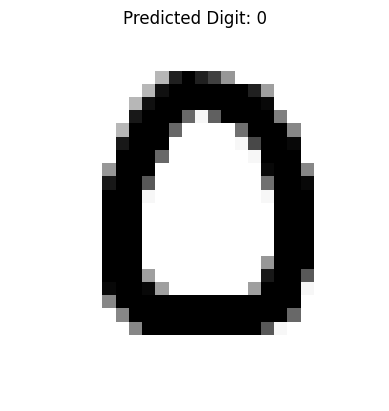

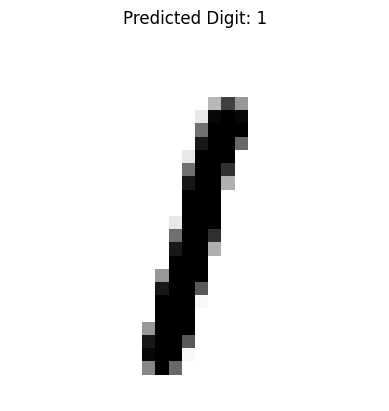

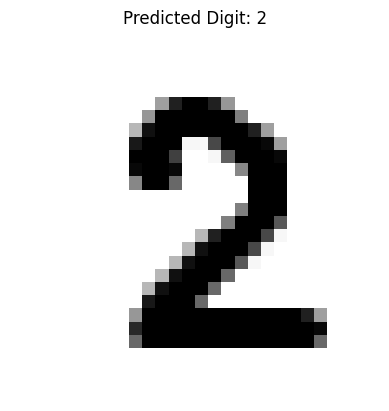

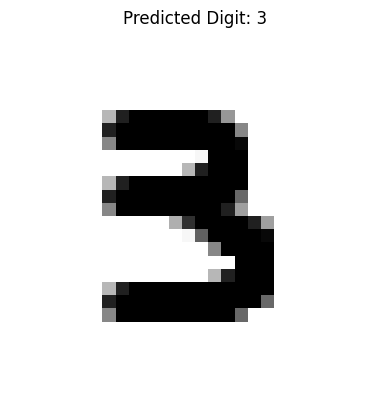

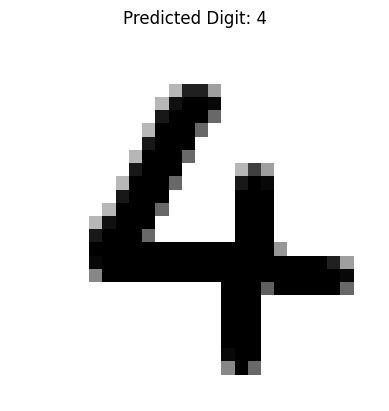

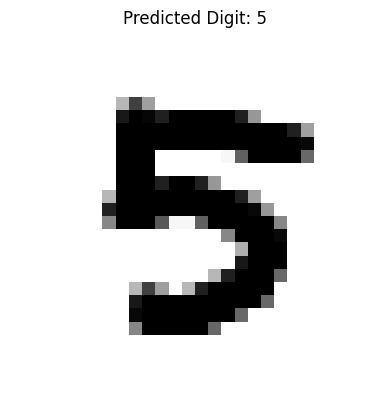

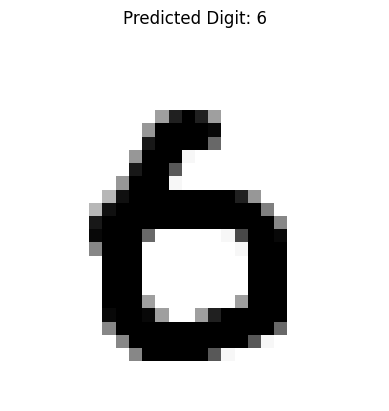

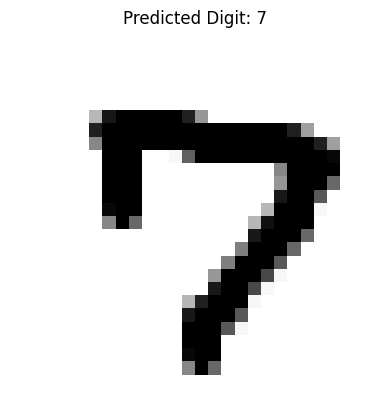

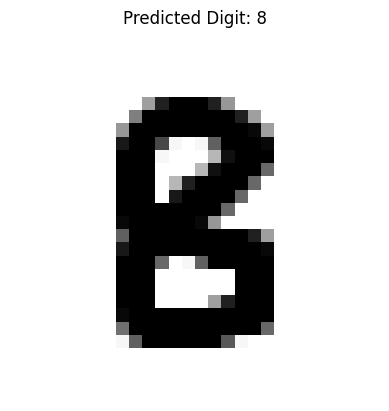

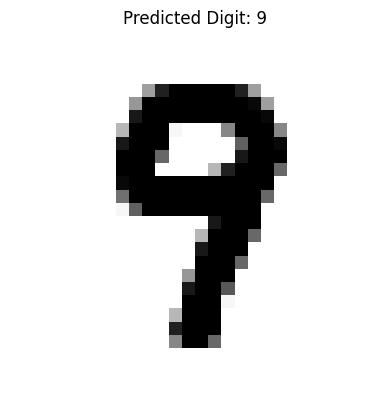

In [11]:
for i in range(0, 10):
    # 画像読み込み & 予測
    image, pixel_values = load_and_process_image(f"./test_image/{i}.png")
    prediction = predict_digit(pixel_values)

    # 結果表示
    plt.imshow(image)
    plt.title(f"Predicted Digit: {prediction}")
    plt.axis("off")
    plt.show()